In [2]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("Fish.csv")
v = df.values
f = v[:,2:] #4 features
f = np.array(f, dtype=np.float64)
j, k = f.shape
weight = v[:,1]
print(f)
print(weight)

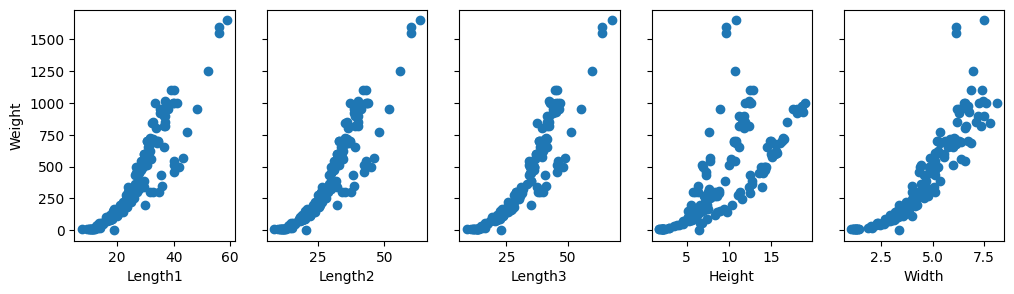

In [85]:
X_Features = ["Length1","Length2","Length3","Height","Width"]
fig,ax = plt.subplots(1,5, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(f[:,i],weight)
    ax[i].set_xlabel(X_Features[i])
ax[0].set_ylabel("Weight")
plt.show()

In [32]:
def z_scale(x):
    mu = np.mean(x, axis=0)
    
    sigma = np.std(x, axis=0)
    
    x_norm = (x - mu) / sigma
    
    return x_norm, mu, sigma

In [78]:
x_norm, mu, sigma = z_scale(f)
print(x_norm)
print(mu)

[[-3.05788578e-01 -2.82303007e-01 -1.06020232e-01  5.96578670e-01
  -2.36528948e-01]
 [-2.25507242e-01 -1.98053663e-01 -2.33668373e-03  8.21260549e-01
  -6.65789457e-02]
 [-2.35542409e-01 -1.79331587e-01 -1.09769794e-02  7.97341291e-01
   1.65793169e-01]
 [ 5.30159764e-03  5.46943678e-02  1.96390116e-01  8.79771455e-01
   2.26210031e-02]
 [ 2.53719316e-02  5.46943678e-02  2.39591594e-01  8.12834979e-01
   4.26371272e-01]
 [ 5.54774324e-02  1.20221635e-01  3.00073664e-01  1.08395111e+00
   3.03431249e-01]
 [ 5.54774324e-02  1.20221635e-01  2.82793073e-01  1.21901769e+00
   5.12357880e-01]
 [ 1.35758768e-01  1.48304750e-01  3.25994551e-01  8.65728838e-01
   1.62163285e-01]
 [ 1.35758768e-01  1.48304750e-01  3.34634847e-01  1.17815367e+00
   2.53683979e-01]
 [ 2.26075271e-01  2.13832017e-01  4.29678099e-01  1.23004114e+00
   3.22473266e-01]
 [ 2.16040104e-01  2.41915132e-01  4.29678099e-01  1.23851352e+00
   4.08638393e-01]
 [ 2.46145605e-01  2.41915132e-01  4.29678099e-01  1.26393066e+00

In [34]:
def predictions(x,y,m,c):
    l, w = x.shape
    predictions = np.zeros(l)
    for i in range(l):
        predictions[i] = (np.dot(x[i],m)) + c
        
    return predictions

In [35]:
def compute_cost(x,y,m,c):
    l, w = x.shape
    cost = 0
    for i in range(l):
        prediction = (np.dot(x[i], m)) + c
        cost += (prediction - y[i]) ** 2
    cost /= (2 * l)
    
    return cost

In [46]:
def compute_gradient(x,y,m,c):
    l,w = x.shape
    d_m = np.zeros(w)
    d_c = 0
    for i in range(l):
        err = ((np.dot(x[i], m)) + c) - y[i]
        for j in range(w):
            d_m += err * x[i,j]
        d_c += err
        
    d_m /= l
    d_c /= l
    
    return d_m, d_c

In [63]:
def gradient_descent(x, y, init_m, init_c, alpha, iterations, gradient_function, cost_function):
    m = copy.deepcopy(init_m)
    c = init_c
    cost_history = []
    
    for i in range(iterations):
        d_m, d_c = gradient_function(x,y,m,c)
        
        m = m - alpha * d_m
        c = c - alpha * d_c
    
        if(i % math.ceil(iterations/10) == 0):
            cost_history.append(compute_cost(x,y,m,c))
            print(f"Iteration {i}: Cost = {cost_history[-1]:0.2e}")
    
    return m, c, cost_history

In [ ]:
#parameters
init_m = np.zeros(k)
init_c = 0
alpha = 0.09
iterations = 100000
m, c, cost_history = gradient_descent(x_norm, weight, init_m, init_c, alpha, iterations, compute_gradient, compute_cost)
print(m, c)

Iteration 0: Cost = 1.25e+05


In [88]:
#testing correctness
# First, normalize out example.
ex = np.array([13.8, 15, 16.2, 2.9, 1.8])
ex_norm = (ex - mu) / sigma
print(ex_norm)
ex_predict = np.dot(ex_norm, m) + c
print(f" predicted weight of a fish which has length1 = 69, length2 = 42, length3 = 13, height =95, width = 27 = {ex_predict}") 

[-1.24909427 -1.25585098 -1.29838103 -1.42087737 -1.55756888]
 predicted weight of a fish which has length1 = 69, length2 = 42, length3 = 13, height =95, width = 27 = -88.08101541852847


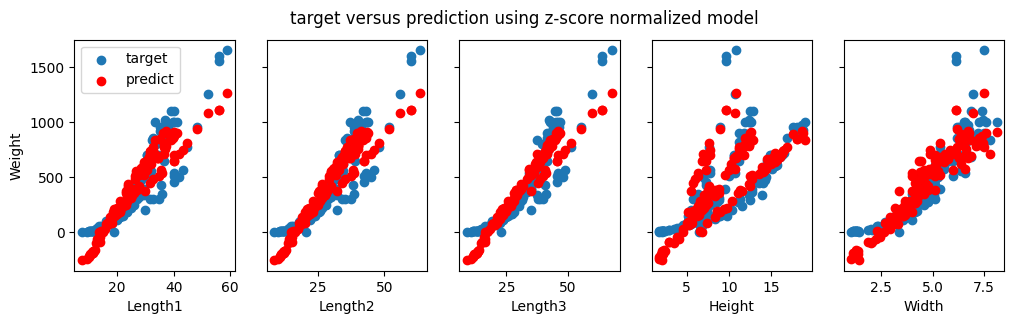

In [89]:
#predict target using normalized features
a = x_norm.shape[0]
yp = np.zeros(a)
for i in range(a):
    yp[i] = np.dot(x_norm[i], m) + c

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,5,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(f[:,i],weight, label = 'target')
    ax[i].set_xlabel(X_Features[i])
    ax[i].scatter(f[:,i],yp,color="red", label = 'predict')
ax[0].set_ylabel("Weight"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [5]:
x = np.arange(0, 20, 1)
print(x)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
